In [51]:
# San Diego Remote Sensing: Tree Height Structure Clustering Analysis
# Author: Judith Bross
# Date: 2025-07-08

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA

os.environ["OMP_NUM_THREADS"] = "1"  # Avoid threading warnings

# ---------------------------------------------
# STEP 1: Load and Clean Tree Height Bin Percent Data
# ---------------------------------------------

file_path = r"C:\Users\jbros\OneDrive\Documents\SanDiego_RemoteSensing\kmean_percents.csv"
df = pd.read_csv(file_path, index_col='site_id')

# Keep rows that sum to ~1 (valid normalized percent rows)
row_sums = df.sum(axis=1)
df = df[(row_sums >= 0.95) & (row_sums <= 1.05)]
df_filled = df.fillna(0)

# ---------------------------------------------
# STEP 2: Normalize Data for Clustering
# ---------------------------------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_filled)


C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

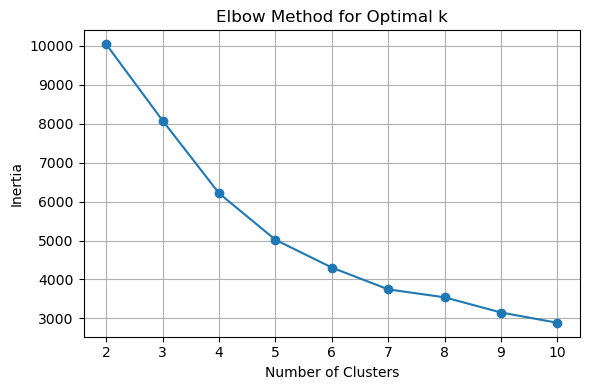


Evaluating k=3
Silhouette Score: 0.367


C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


,mean,std,count
cluster,,,
0,0.643719,0.146726,754
1,0.115504,0.171421,824
2,0.234937,0.216395,5


C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(



Evaluating k=5
Silhouette Score: 0.427


,mean,std,count
cluster,,,
0,0.396297,0.180211,592
1,0.152920,0.168573,257
2,0.563291,0.054051,3
3,0.587104,0.192320,678
4,0.053673,0.172539,53



Evaluating k=6
Silhouette Score: 0.440


C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


,mean,std,count
cluster,,,
0,0.375795,0.184067,559
1,0.109020,0.193057,60
2,0.560899,0.052015,3
3,0.587651,0.193494,673
4,0.052209,0.169838,46
5,0.334327,0.171893,242


C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(



Evaluating k=7
Silhouette Score: 0.448


,mean,std,count
cluster,,,
0,0.369873,0.186653,563
1,0.196610,0.202656,42
2,0.544713,0.038446,3
3,0.597244,0.190310,669
4,0.066154,0.151290,21
5,0.356068,0.165265,235
6,0.139888,0.187396,50



Evaluating k=8
Silhouette Score: 0.452


C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


,mean,std,count
cluster,,,
0,0.400701,0.186327,537
1,0.226742,0.177964,32
2,0.524830,0.030801,3
3,0.632127,0.181667,642
4,0.085976,0.182622,32
5,0.355397,0.169178,232
6,0.145913,0.140632,16
7,-0.026741,0.161056,89


In [55]:
# ---------------------------------------------
# STEP 3: Determine Optimal k with Elbow + Silhouette
# ---------------------------------------------

inertia = []
K_range = range(2, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# Silhouette Scores for selected k values
def evaluate_kmeans(X, k):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    sil_samples = silhouette_samples(X, labels)
    sil_overall = silhouette_score(X, labels)
    df_temp = pd.DataFrame({'cluster': labels, 'silhouette': sil_samples})
    return sil_overall, df_temp.groupby('cluster')['silhouette'].agg(['mean', 'std', 'count'])

for k in [3, 5, 6, 7, 8]:
    print(f"\nEvaluating k={k}")
    score, stats = evaluate_kmeans(X_scaled, k)
    print(f"Silhouette Score: {score:.3f}")
    display(stats)

In [59]:

# ---------------------------------------------
# STEP 4: Final KMeans (k=5) and Assign Labels
# ---------------------------------------------

kmeans = KMeans(n_clusters=5, random_state=42)
df_filled['cluster'] = kmeans.fit_predict(X_scaled)

# Save clustered data
df_filled.to_csv(r"C:\Users\jbros\OneDrive\Documents\SanDiego_RemoteSensing\kmeans_clusters_k5_filled.csv")

# Descriptive cluster labels
cluster_names = {
    0: "5–10m dominant",
    1: "10–15m dominant",
    2: "0–40m mixed structure",  # Note: will be excluded in later stats
    3: "0–5m dominant",
    4: "0–25m mixed structure"
}
df_filled['cluster_label'] = df_filled['cluster'].map(cluster_names)

# Save labeled version
df_filled.to_csv(r"C:\Users\jbros\OneDrive\Documents\SanDiego_RemoteSensing\kmeans_clusters_k5_named.csv")


C:\Users\jbros\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


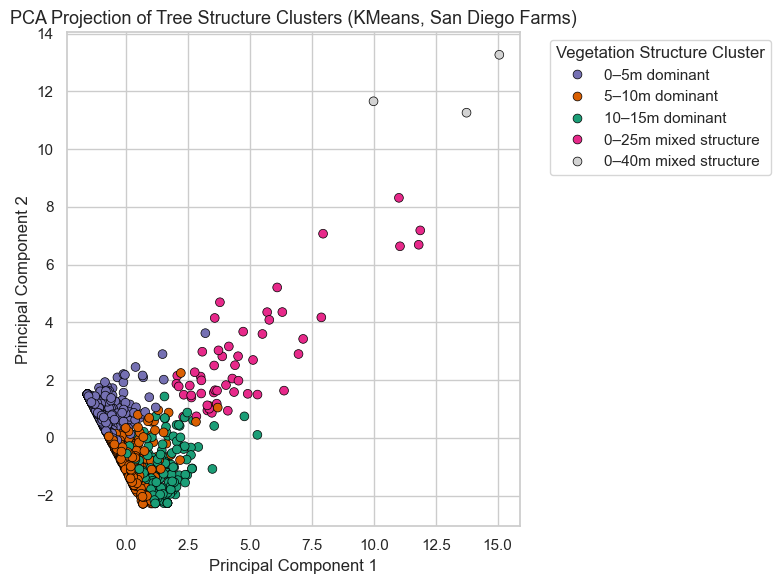

In [87]:
# ---------------------------------------------
# STEP 5: Visualize Clusters in PCA Space
# ---------------------------------------------

from matplotlib.lines import Line2D

# Remove 'cluster' and 'cluster_label' to get original features again
features = df_filled.drop(columns=['cluster', 'cluster_label'])

# Re-scale features before PCA
X_pca = StandardScaler().fit_transform(features)

# Run PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_pca)

# Prepare for plotting
df_pca_plot = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'cluster_label': df_filled['cluster_label']
})

# Define the matching color palette
custom_palette = {
    "0–5m dominant": "#7570b3",   
    "5–10m dominant": "#d95f02",
    "10–15m dominant": "#1b9e77",    
    "0–25m mixed structure": "#e7298a",
    "0–40m mixed structure": "lightgray"
}

# Define the desired cluster order
ordered_clusters = [
    "0–5m dominant",
    "5–10m dominant",
    "10–15m dominant",
    "0–25m mixed structure",
    "0–40m mixed structure"
]

# Plot PCA scatter with matching cluster colors and ordered legend
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_pca_plot,
    x='PC1', y='PC2',
    hue='cluster_label',
    hue_order=ordered_clusters,
    palette=custom_palette,
    s=40,
    edgecolor='black'
)

plt.title("PCA Projection of Tree Structure Clusters (KMeans, San Diego Farms)", fontsize=13)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(
    title="Vegetation Structure Cluster",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.grid(True)
plt.tight_layout()
plt.show()



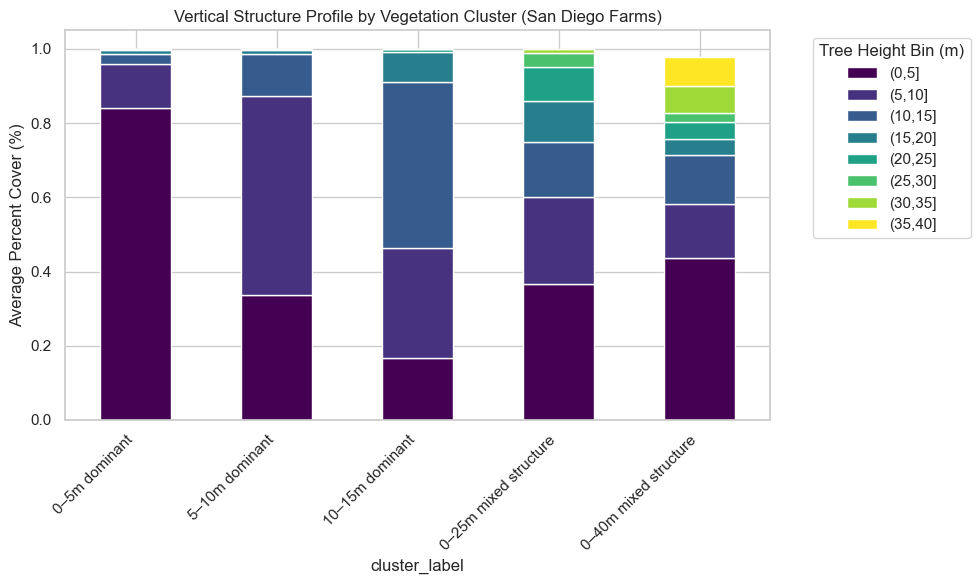

In [79]:
# ---------------------------------------------
# STEP 5: Visualize Vertical Structure Profiles by Cluster
# ---------------------------------------------

# Prepare height bin columns
height_bins = ['(0,5]', '(5,10]', '(10,15]', '(15,20]', '(20,25]', '(25,30]', '(30,35]', '(35,40]']

# Compute mean percent cover per height bin by cluster
cluster_means = df_filled.groupby('cluster_label')[height_bins].mean()

# Order for meaningful visual interpretation
desired_order = [
    "0–5m dominant",
    "5–10m dominant",
    "10–15m dominant",
    "0–25m mixed structure",
    "0–40m mixed structure"
]
cluster_means = cluster_means.reindex(desired_order)

# Plot stacked bar chart
ax = cluster_means.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

plt.ylabel("Average Percent Cover (%)")
plt.title("Vertical Structure Profile by Vegetation Cluster (San Diego Farms)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Tree Height Bin (m)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


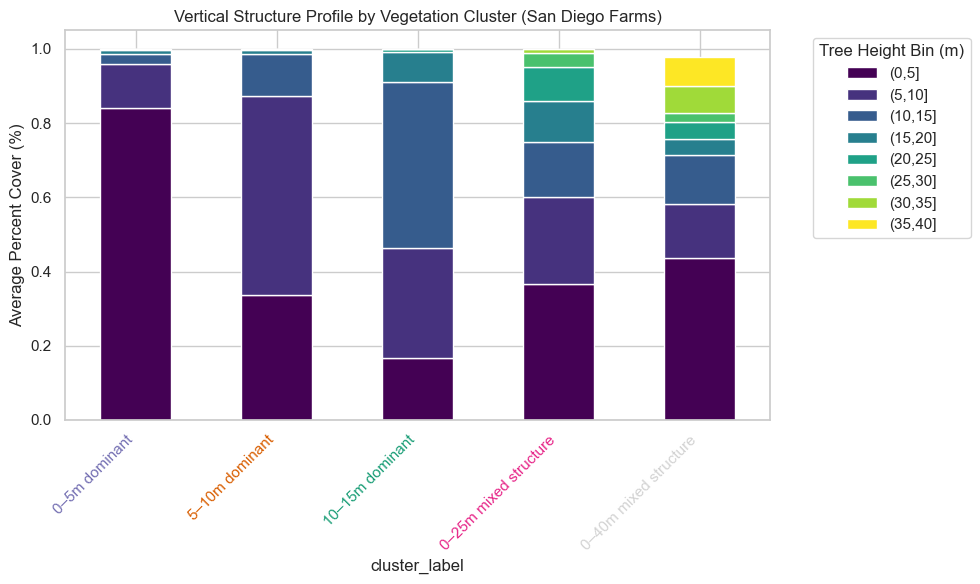

In [83]:
# Plot the stacked bar chart
ax = cluster_means.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='viridis'
)

# Apply custom tick label colors (match PCA cluster palette)
custom_palette = {
    "10–15m dominant": "#1b9e77",
    "5–10m dominant": "#d95f02",
    "0–5m dominant": "#7570b3",
    "0–25m mixed structure": "#e7298a",
    "0–40m mixed structure": "lightgray"
}

# Update x-axis label colors to match PCA cluster colors
for tick_label in ax.get_xticklabels():
    label = tick_label.get_text()
    tick_label.set_color(custom_palette.get(label, 'black'))

plt.ylabel("Average Percent Cover (%)")
plt.title("Vertical Structure Profile by Vegetation Cluster (San Diego Farms)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Tree Height Bin (m)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



 Missing cluster labels: 455
 Cluster distribution:
 cluster_label
0–5m dominant            920
5–10m dominant           658
NaN                      455
10–15m dominant          296
0–25m mixed structure     62
0–40m mixed structure      3
Name: count, dtype: int64


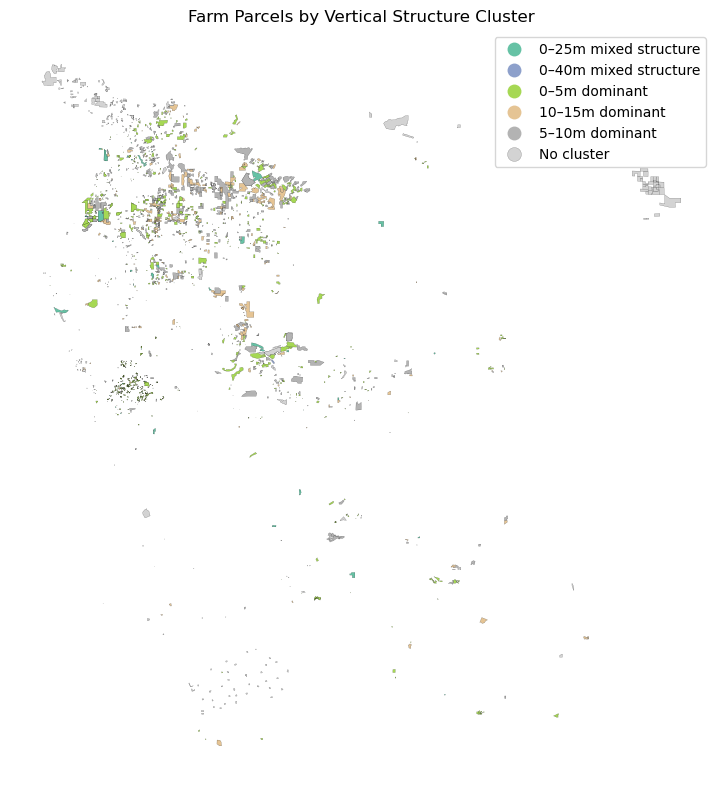

In [63]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load parcel shapefile
gdf = gpd.read_file(
    r"C:\Users\jbros\OneDrive\Documents\SanDiego_RemoteSensing\Agricultural_Commodity_2020_shapefile\Agricultural_Commodity_2020.shp"
)

# Load cluster-labeled CSV
df_clusters = pd.read_csv(
    r"C:\Users\jbros\OneDrive\Documents\SanDiego_RemoteSensing\kmeans_clusters_k5_named.csv"
)

# Clean and standardize 'site_id'
gdf['site_id'] = gdf['site_id'].astype(str).str.strip()
df_clusters['site_id'] = df_clusters['site_id'].astype(str).str.strip()

# Merge clusters into GeoDataFrame
gdf = gdf.merge(df_clusters, on="site_id", how="left")

# Report merge status
n_missing = gdf['cluster_label'].isna().sum()
print(f" Missing cluster labels: {n_missing}")
print(" Cluster distribution:\n", gdf['cluster_label'].value_counts(dropna=False))

# Plot clusters
fig, ax = plt.subplots(figsize=(10, 8))
gdf.plot(
    column='cluster_label',
    cmap='Set2',
    legend=True,
    edgecolor='black',
    linewidth=0.1,
    missing_kwds={"color": "lightgrey", "label": "No cluster"},
    ax=ax
)
ax.set_title("Farm Parcels by Vertical Structure Cluster")
ax.axis('off')
plt.tight_layout()
plt.show()


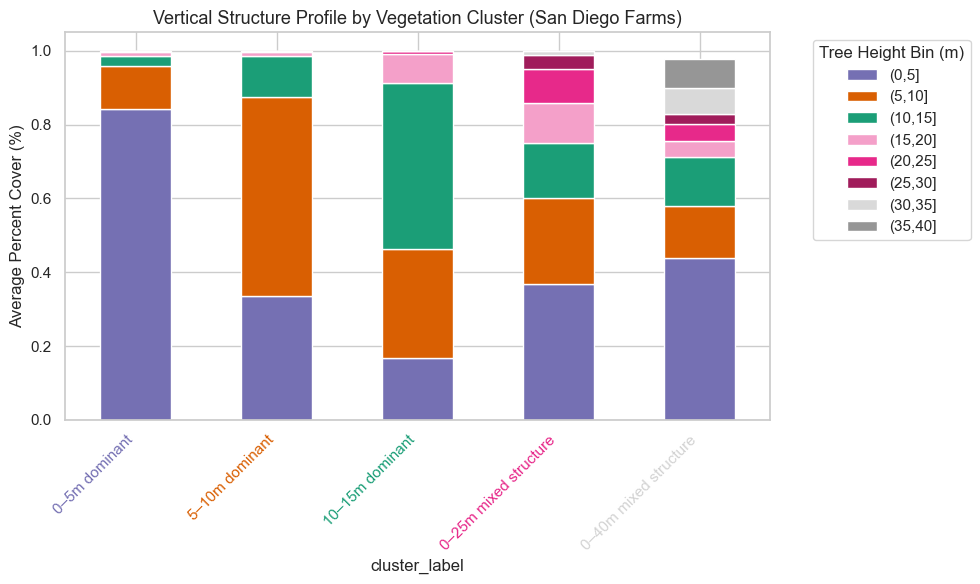

In [92]:
# Define updated bin color mapping with pink and gray variations
bin_colors = {
    '(0,5]':     '#7570b3',   # purple
    '(5,10]':    '#d95f02',   # orange
    '(10,15]':   '#1b9e77',   # green
    '(15,20]':   '#f4a0c9',   # light pink
    '(20,25]':   '#e7298a',   # medium pink
    '(25,30]':   '#a01c5b',   # deep pink
    '(30,35]':   '#d9d9d9',   # light gray
    '(35,40]':   '#969696'    # medium gray
}

# Ensure height bin columns match color order
cluster_means = cluster_means[bin_colors.keys()]

# Plot the stacked bar chart with refined bin colors
ax = cluster_means.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=[bin_colors[bin_label] for bin_label in cluster_means.columns]
)

# Color the x-axis tick labels to match cluster colors
cluster_palette = {
    "0–5m dominant": "#7570b3",
    "5–10m dominant": "#d95f02",
    "10–15m dominant": "#1b9e77",
    "0–25m mixed structure": "#e7298a",
    "0–40m mixed structure": "lightgray"
}

for tick_label in ax.get_xticklabels():
    label = tick_label.get_text()
    tick_label.set_color(cluster_palette.get(label, 'black'))

# Labels and formatting
plt.ylabel("Average Percent Cover (%)")
plt.title("Vertical Structure Profile by Vegetation Cluster (San Diego Farms)", fontsize=13)
plt.xticks(rotation=45, ha='right')
plt.legend(title="Tree Height Bin (m)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
